(assign8_solution)=
# Assignment 8 solution

## Question 1

- Confirm that the mean diameter of the Marshall Palmer distribution is $1/\Lambda$

### Question 1 answer

$$
n(D)=N_0 e^{-\Lambda D}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def marshallpalmer(D):
    """
    marshall palmer size distribution
    given rainrate R in mm/hr, return
    n(D), the number concentration of drops with
    diameter D

    Parameters
    ----------
    R: float
        rainrate (mm/hr)

    Returns
    -------

    d: vector (float)
      drop diameters (cm)

    n: vector (float)
     the number distribution n(d) #m^{-3} mm^{-1}

    """
    D=np.arange(0,8,0.01)
    Dmm=D
    Dcm=D*0.1
    N0=0.08*1.e6*1.e-1 #m**{-3} mm^{-1}
    theLambda=41*R**(-0.21)
    n=N0*np.exp(-theLambda*Dcm)
    return Dcm,n

#### Numerical example: Calculate the mean numerically for R = 15 mm/hour

In [2]:
R = 15 #mm/hr
theLambda=41*R**(-0.21)
print('mean diameter = {:6.3g} cm'.format(1./theLambda))
diam,ndist = marshallpalmer(R)  #cm, m^{-3} mm^{-1}
binwidth = np.diff(diam)[0]*10  #bin width in mm
approx_diam = np.sum(diam*ndist*binwidth)/np.sum(ndist*binwidth)
print('approx diameter = {:6.3g} cm'.format(approx_diam))

mean diameter = 0.0431 cm
approx diameter = 0.0426 cm


#### Analytic solution
Start with the definition of the mean:

$$
\overline{x}  = \frac{\int_0^\infty x e^{c x}\,dx}{\int_0^\infty e^{c x}\,dx}
$$

then use this result from [https://en.wikipedia.org/wiki/List_of_integrals_of_exponential_functions](https://en.wikipedia.org/wiki/List_of_integrals_of_exponential_functions) works:

$$
\int_0^\infty x e^{c x} d x=
  e^{c x}\left(\frac{c x-1}{c^2}\right)   \bigg \rvert_0^\infty \quad \text { for } c = - \Lambda
$$

## Question 2

- Calculate the precipitation flux (mm/hr) by integrating the total volumen in the Marshall Palmer size distribution and with the fall speed of Villermaux and Bossa (2009): $w = - \sqrt{\rho_l/\rho_{air} * g *D}$ where
D is the drop diameter and $\rho_l,\rho_{air}$ are the liquid and air densities.  Show
that you get about R=15 mm/hour back from this calculation if you use the $\Lambda$ that's appropriate for  R=15 mm/hour

### Question 2 answer

In [15]:
def find_uthompkins(diams):
    """
    Thompkins p. 77 table
    
    Parameters
    ----------
    
    diams: vector of floats
         drop diamter (meters)
         
    Returns
    -------
    
    vel_vec: vector of floats
           fall speed (m/s) 
    """
    diams = np.atleast_1d(diams)
    rvals = diams/2.
    #diam in meters, thompkins p. 77
    vel_list=[]
    #
    #  thompkins defines 3 different fallspeeds in 
    #  different size ranges
    #
    edges = np.array([0,30,1000,8000])*1.e-6  #meters
    bins = np.searchsorted(edges,rvals)
    for r, bin in zip(rvals,bins):
        if bin == 1:
            vel = 1.2e8*r**2.
        elif bin == 2:
            vel = 6.e3*r  #Thompkins says 8000?
        elif bin == 3:
            vel = 250*0.75*np.sqrt(r)  #0.75 fudge factor to get curve match
        else:
            if r==0:
                vel=0.
            else:
                raise ValueError('droplet size out of bounds')
        vel_list.append(vel)
    return np.array(vel_list)
    
#find the rain rate for a dropsize distribution
#specified by a marshall-palmer distribution of 15 mm/hour
import numpy as np
g=9.8  #m/s^2
rho=1  #kg/m^3 air density
rhol=1000. #kg/m^3 liquid water density
R=15 #mm/hr
diam,ndist = marshallpalmer(R)
diam = diam*1.e-2 #meters
Unature=np.sqrt(rhol/rho*g*diam) #m/s  Villermaux and Bossa, 2009
Uthompkins = find_uthompkins(diam) #thompkins
Udict=dict(Unature=Unature,Uthompkins=Uthompkins)
for name,U in Udict.items():
    binwidth = np.diff(diam)[0]*1.e3 #mm
    R=np.sum(ndist*np.pi*(diam**3)/6*U*binwidth) #flux in m/s
    R=R*1000*3600. #mm/hour
    print(f'\nfor {name} with R=15 mm/hour integration gives {R:8.2f} mm/hour\n')


for Unature with R=15 mm/hour integration gives    12.40 mm/hour


for Uthompkins with R=15 mm/hour integration gives    14.80 mm/hour



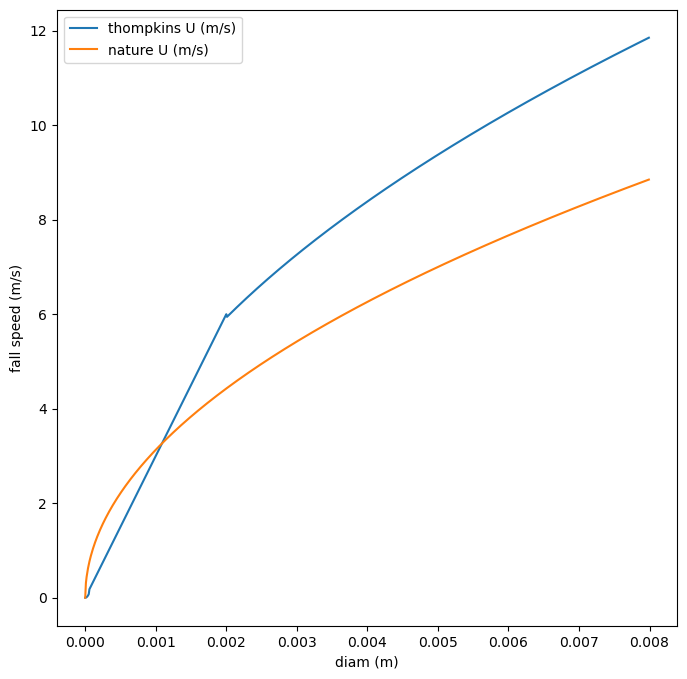

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(diam,Uthompkins,label='thompkins U (m/s)')
ax.plot(diam,Unature,label='nature U (m/s)')
ax.legend(loc='best')
out=ax.set(xlabel='diam (m)',ylabel='fall speed (m/s)')


### Question 3: Lohmann problem 4 page 250:

  - Mixed-phase clouds contain ice crystals as well as liquid droplets. Consider such a cloud at a temperature $T=-4^{\circ} \mathrm{C}$, pressure $p=800 \mathrm{hPa}$ and a humidity which corresponds to supersaturations with respect to ice of $5 \%$ and with respect to water of $1 \%$. In the cloud, an ice crystal and a droplet both grow by diffusion, each starting from mass $m_0=10^{-8} \mathrm{~g}$. The ice crystal is a thin hexagonal plate, so that its capacitance can be approximated by $C=2 r_i / \pi$, where $r_i$ is the radius of the ice crystal.

$$
\frac{dm_i}{dt}=\alpha_m \frac{4 \pi C\left(S_i-1\right)}{F_k^i+F_d^i}
$$

$$
F_k^i=\left(\frac{L_s}{R_v T}-1\right) \frac{L_s}{K T}
$$

$$
F_d^i=\frac{R_v T}{D_v e_{s, i}(T)}
$$

(a) Determine the times it takes for the droplet and the ice crystal to grow to a total mass $m_1=1.1 \times 10^{-8} \mathrm{~g}$. You can neglect solution and curvature effects when calculating the droplet growth. For the ice crystal, you can assume that its mass $m_i$ and diameter $d_i$ are related by $m_i=\alpha d_i^3$, with $\alpha=1.9 \times 10^{-2} \mathrm{~g} \mathrm{~cm}^{-3}$.

Borrow code from Week 11:  {ref}`ice_saturation`

In [9]:
from a405.thermo.constants import constants as c

def ls(temp):
    ci_cpv = 212  #J/kg/K
    ls0 = 2.834e6
    lsval = -ci_cpv*(temp - c.Tp) + ls0
    return lsval

def eice_new(T):
    """
    saturation vapor pressure with respect to ice

    Parameters
    ----------

    T: temperature (K)

    Returns
    -------

    eice_out: vapor pressure (Pa)
    
    """
    ci_cpv = 212  #J/kg/K
    ls0 = 2.834e6
    term1 = c.es0*100.*(c.Tp/T)**(ci_cpv/c.Rv)
    term2 = ls0/(c.Rv*c.Tp)
    ls = -ci_cpv*(T - c.Tp) + ls0
    term3 = ls/(c.Rv*T)
    eice_out=term1*np.exp((term2 - term3))
    return eice_out

### Ice crystal dmdt

In [14]:
temp = c.Tc - 4
lsval = ls(temp)
esice = eice_new(temp)
K = 0.024  #W/m/K
D = 2.6e-5 #m^2/s
alpham = 0.05
alpha = 1.9e-2  #g/cm^3
mass1 = 1.1e-8 #g
radius1 = (mass1/(8*alpha))**(1./3.)
C=2*radius1/np.pi  #cm
thompkins_coefficient = D*esice/(c.rhol*c.Rv*temp)
lohmann_FK = lsval**2/(K*c.Rv*temp**2.)
lohmann_FD = 1/thompkins_coefficient
S=1.05
dmdt = alpham*4*np.pi*C*(S-1)/(lohmann_FK + lohmann_FD)
dmdt

7.620612516305804e-15

#### Water drop dmdt

$$
\frac{d M}{d t}=4 \pi D r\left(\rho_v(\infty)-\rho_v(r)\right)
$$

In [17]:
def esat_new(T):
    """
    saturation vapor pressure with respect to liquid
     
    Parameters
    ----------
    
    T: temperature (K)
    
    Returns
    -------
    
    ear_out: vapor pressure (Pa)
    """
    cl_cpv = 2180  #J/kg/K
    term1 = c.es0*100.*(c.Tp/T)**(cl_cpv/c.Rv)
    term2 = c.lv0/(c.Rv*c.Tp)
    lv = -cl_cpv*(T - c.Tp) + c.lv0
    term3 = lv/(c.Rv*T)
    esat_out=term1*np.exp((term2 - term3))
    return esat_out

(b) Which of the two cloud particles grows faster? Explain the main reason for the difference in growth speed.

(c) How would the situation in the mixed-phase cloud change for supersaturation with respect to ice but subsaturation with respect to water? Explain qualitatively in a few sentences.